<a href="https://colab.research.google.com/github/nurfian-aziz/python/blob/main/Tugas%2011%20Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [31]:
ls

PythonWeek11/  Untitled0.ipynb


In [32]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [33]:
print ("[INFO] loading images...")
imagePaths = paths.list_images("/content/drive/MyDrive/Colab Notebooks")
data = []
labels = []

[INFO] loading images...


In [34]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it ti 64x64 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  data.append(image)

  # extract the class lavel from the file path update the
  # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [35]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [36]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [37]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [38]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(451, 128, 128, 3)
(151, 128, 128, 3)


In [221]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(64, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(52, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully_connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5,activation='softmax' ))

model1.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 61, 61, 52)        30004     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 30, 30, 52)        0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 46800)             0         
_________________________________________________________________
dense_72 (Dense)             (None, 100)               4680100   
_________________________________________________________________
dense_73 (Dense)             (None, 5)               

In [225]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
15/15 [==============================] - 15s 1s/step - loss: 0.1201 - accuracy: 0.9579 - val_loss: 1.4426 - val_accuracy: 0.6954
Epoch 2/25
15/15 [==============================] - 15s 993ms/step - loss: 0.1239 - accuracy: 0.9623 - val_loss: 1.1854 - val_accuracy: 0.6755
Epoch 3/25
15/15 [==============================] - 18s 1s/step - loss: 0.0430 - accuracy: 0.9889 - val_loss: 1.2415 - val_accuracy: 0.7020
Epoch 4/25
15/15 [==============================] - 15s 1s/step - loss: 0.0201 - accuracy: 0.9978 - val_loss: 1.3410 - val_accuracy: 0.7086
Epoch 5/25
15/15 [==============================] - 15s 1s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.2955 - val_accuracy: 0.7285
Epoch 6/25
15/15 [==============================] - 15s 1s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.3808 - val_accuracy: 0.7219
Epoch 7/25
15/15 [==============================] - 16s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.3624 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


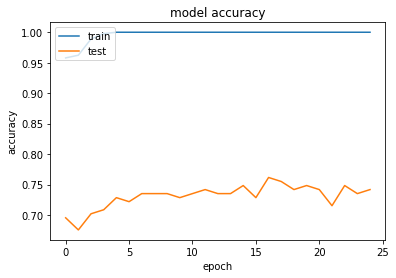

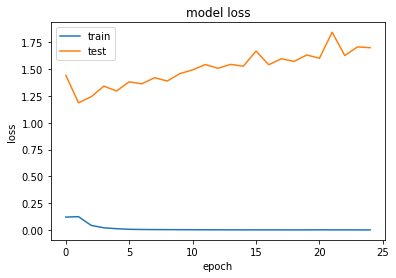

In [226]:
import matplotlib.pyplot as plt

print(H.history.keys())
#summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [227]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_03       0.74      0.80      0.77        25
      GMB_04       0.64      0.78      0.70        27
      GMB_06       0.85      0.64      0.73        36
      GMB_07       0.75      0.71      0.73        34
      GMB_08       0.75      0.83      0.79        29

    accuracy                           0.74       151
   macro avg       0.75      0.75      0.74       151
weighted avg       0.75      0.74      0.74       151



In [196]:
model1.save('modeldaun_scene')

INFO:tensorflow:Assets written to: modeldaun_scene/assets


In [197]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/PythonWeek11/GMB_07/IMG_20200814_120040_HDR.jpg'

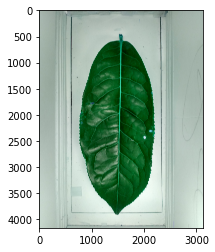

In [198]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [200]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/PythonWeek11/GMB_07/IMG_20200814_120040_HDR.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [201]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [202]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.6306562e-04 4.3980677e-02 5.1802670e-04 9.5379531e-01 1.4428232e-03]]
['GMB_07']
